# Google Playstore Rating

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GPS=pd.read_csv('/content/google.csv')

In [3]:
GPS.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#my_report.show_html('report.html') # clearly visual the raw dataset.

In [5]:
GPS.isna().sum() #see the missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
GPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
GPS.shape

(10841, 13)

In [8]:
GPS.Rating=GPS.Rating.fillna(GPS['Rating'].median())#fill null values with median of Rating

In [9]:
GPS.dropna(inplace=True)

In [10]:
GPS.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
GPS.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [12]:
GPS[GPS.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Free    10032
Paid      797
Name: Type, dtype: int64
--------------------------------------------------


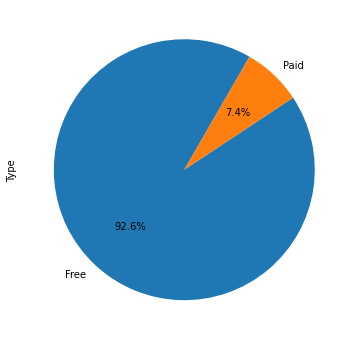

In [13]:
#Type
print(GPS.Type.value_counts())
print('-'*50)
GPS.Type.value_counts().plot.pie(figsize=(6,6),autopct='%1.1f%%', startangle=60)

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
ART_AND_DESIGN           64
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64
-----------------------------------------------

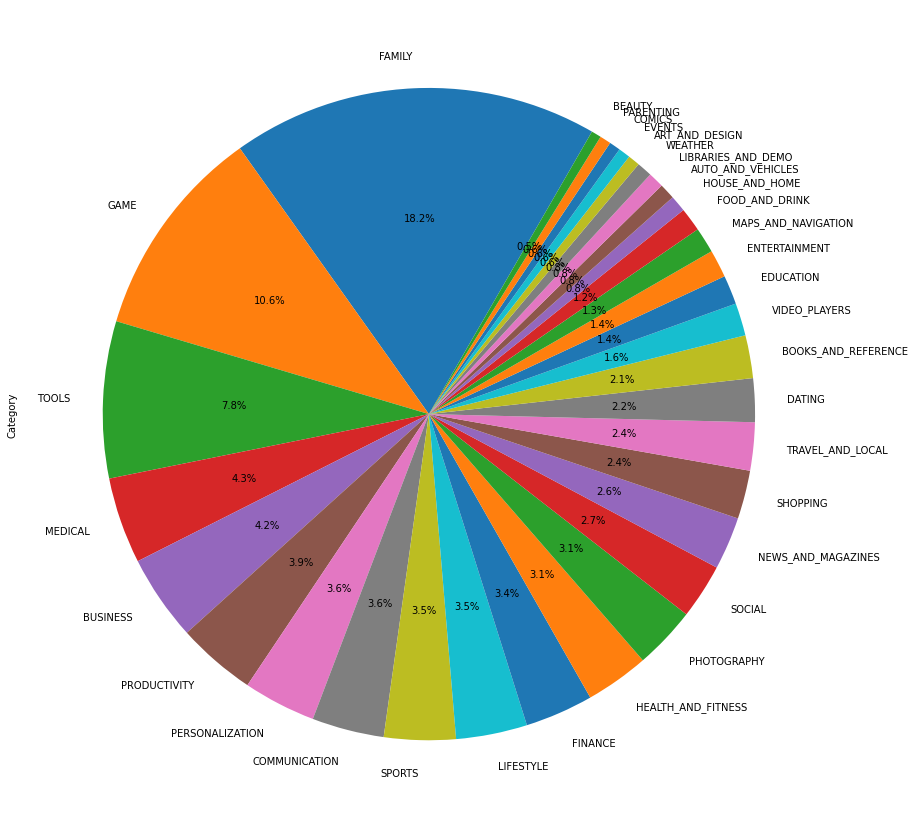

In [14]:
print(GPS.Category.value_counts())
print('-'*50)
GPS.Category.value_counts().plot.pie(figsize=(20,15),autopct='%1.1f%%', startangle=60)

In [15]:
GPS.Genres.value_counts()

Tools                          840
Entertainment                  622
Education                      548
Medical                        463
Business                       460
                              ... 
Racing;Pretend Play              1
Trivia;Education                 1
Strategy;Education               1
Music & Audio;Music & Video      1
Arcade;Pretend Play              1
Name: Genres, Length: 119, dtype: int64

In [16]:
GPS.drop(GPS[GPS['Category']== '1.9'].index)#unnecessary values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
GPS[GPS['Size']== 'Varies with divices']=np.nan 

In [18]:
GPS['Size']=GPS.Size.str.replace('M','e3')# convert M value
#convert K value
GPS['Size']=GPS.Size.str.replace('K','e0')

In [19]:
GPS['Size']=pd.to_numeric(GPS['Size'],errors='coerce')
#replace Nan value with mean
GPS['Size']=GPS['Size'].fillna(GPS['Size'].mean())

In [20]:
GPS['Installs']=GPS.Installs.str.replace('+','')
GPS['Installs']=GPS.Installs.str.replace(',','')
GPS['Installs']=GPS['Installs'].astype(int)#convert to numeric


In [21]:
GPS['Price']=GPS.Price.str.replace('$','')
GPS['Price']=GPS['Price'].astype(float)

In [22]:
GPS['Reviews']=GPS['Reviews'].astype(int)
#remove reviews greater than installs
GPS.drop(GPS[GPS['Reviews']>GPS['Installs']].index,axis=0,inplace=True)

EDA

In [23]:
#Top 20 genre as per install count
Top_20_genre = GPS.groupby('Genres')['Installs'].sum().sort_values(ascending = False).reset_index().head(20)
#Top 20 Catogories as per install count
Top_20_Category = GPS.groupby('Category')['Installs'].sum().sort_values(ascending = False).reset_index().head(20)

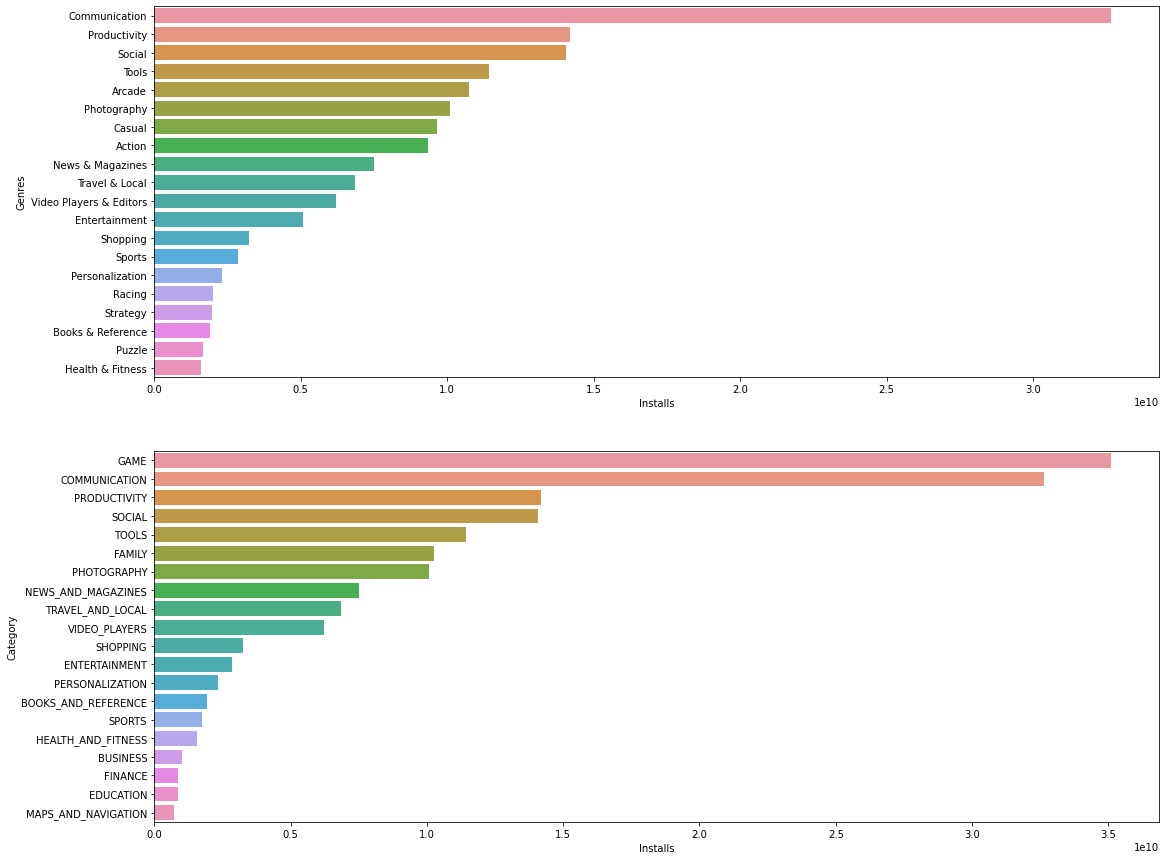

In [24]:
plt.figure(figsize=(18,15))

plt.subplots_adjust(wspace = .5)

plt.subplot(2,1,1)
sns.barplot(x='Installs', y='Genres', data = Top_20_genre )

plt.subplot(2,1,2)
sns.barplot(x='Installs', y= 'Category', data = Top_20_Category)


**Genres**

Communication, productivity, social genres are installed most.

Puzzle and Health related apps are least installed.

Categories

Game, Communication, Productivity categories are installed more.

Education, Finance, Map related, Business categories are installed less.

See Which age group has most review counts

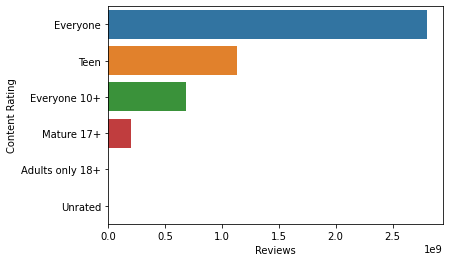

In [25]:
Top_Content_rates=GPS.groupby('Content Rating')['Reviews'].sum().sort_values(ascending = False).reset_index()
sns.barplot(x='Reviews', y='Content Rating', data = Top_Content_rates )

'Everyone' counts the reviews of all. Aside Everyone 'Teen' group reviewed more.

Adults didnot review.

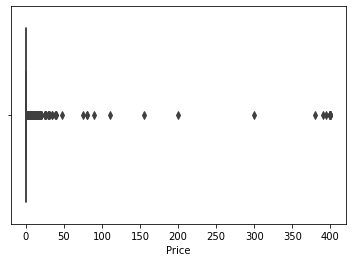

In [26]:
sns.boxplot(x=GPS['Price'])

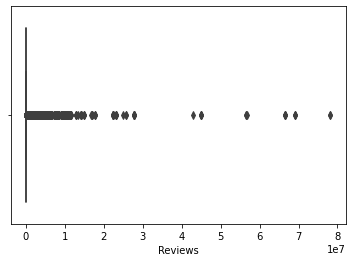

In [27]:
sns.boxplot(x=GPS['Reviews'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


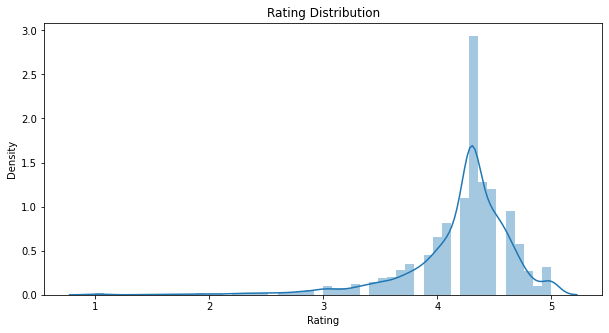

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(GPS['Rating'])
plt.title('Rating Distribution')
plt.show()  #histogram

In [29]:
GPS['Rating'].skew()

-2.065876059755884

In [30]:
GPS['Rating'].kurt()

7.304904465901103

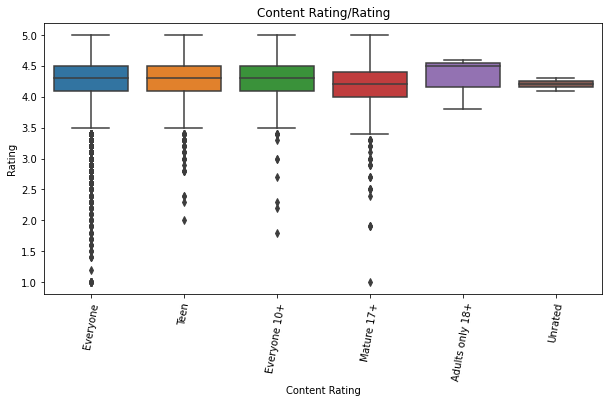

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x=GPS['Content Rating'],y=GPS['Rating'])
plt.title('Content Rating/Rating')
plt.xticks(rotation=80)
plt.show()


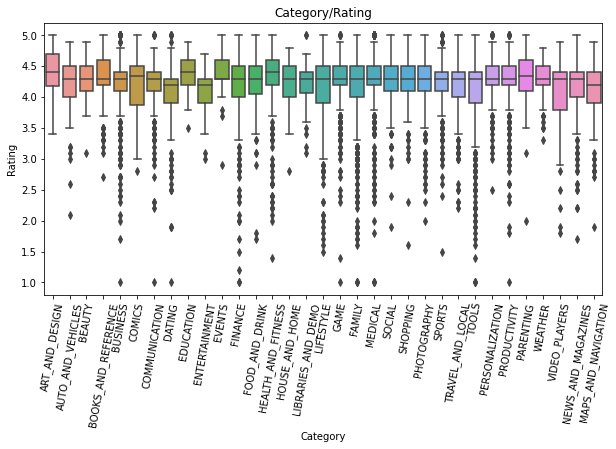

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x=GPS['Category'],y=GPS['Rating'])
plt.title('Category/Rating')
plt.xticks(rotation=80)
plt.show()#events has best rating

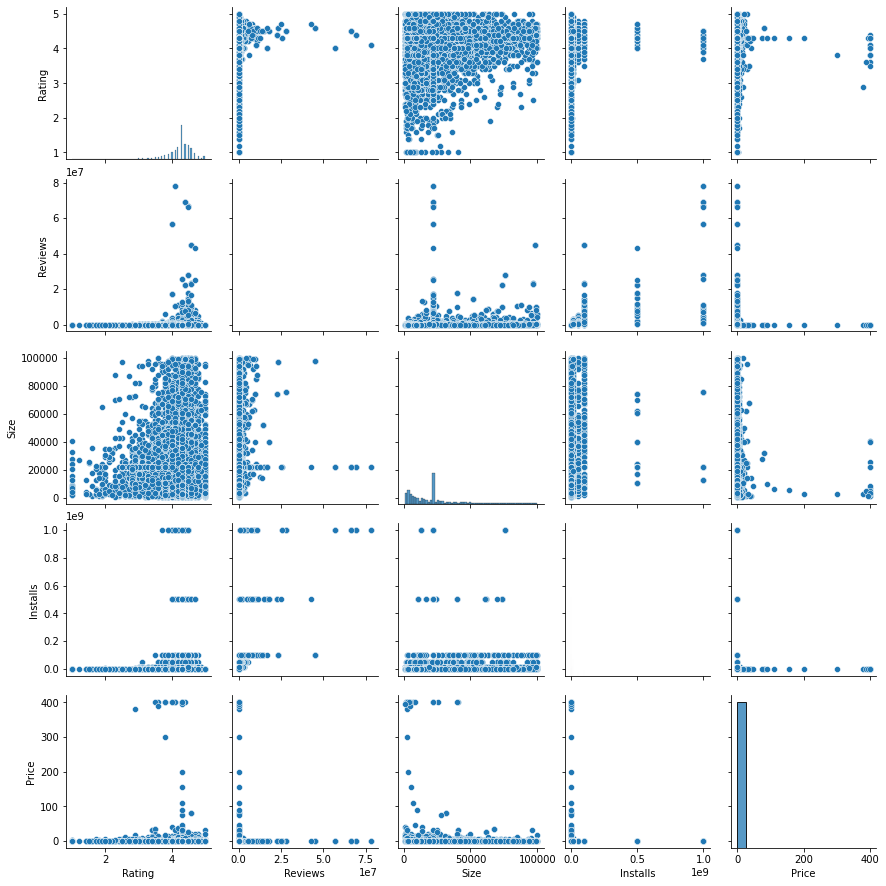

In [33]:
sns.pairplot(GPS)

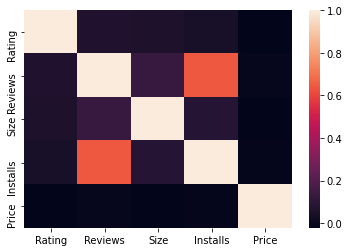

In [34]:
sns.heatmap(GPS.corr())

In [35]:
GPS = GPS.drop(columns=['Last Updated', 'Current Ver','Android Ver','App','Type']) 

In [36]:
GPS.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity


In [37]:
#Content rating
GPS['Content Rating'] = GPS['Content Rating'].map({'Everyone':0,'Teen':1,'Everyone 10+':2,'Mature 17+':3,
                                                     'Adults only 18+':4, 'Unrated':5}).astype(float)


MeanEncoding

In [38]:
#Category
Mean_cat=GPS.groupby('Category')['Rating'].mean().to_dict()
GPS['Category'] = GPS['Category'].map(Mean_cat)

In [39]:
#Genres
Mean_gnr=GPS.groupby('Genres')['Rating'].mean().to_dict()
GPS['Genres'] = GPS['Genres'].map(Mean_gnr)

In [40]:
GPS.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,4.373437,4.1,159,19000.0,10000,0.0,0.0,4.377193
1,4.373437,3.9,967,14000.0,500000,0.0,0.0,3.900000
2,4.373437,4.7,87510,8700.0,5000000,0.0,0.0,4.377193
3,4.373437,4.5,215644,25000.0,50000000,0.0,1.0,4.377193
4,4.373437,4.3,967,2800.0,100000,0.0,0.0,4.400000


In [41]:
X=GPS.drop(['Rating'],axis=1)
Y=GPS.Rating
#train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [42]:
#Transform Data using Standardscaler
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train = Scaler.fit_transform(X_train)
#for X_test
X_test = Scaler.fit_transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rn=RandomForestRegressor(n_estimators=500)
rn.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
rn.score(X_train,Y_train)

0.877573589396152